<a href="https://colab.research.google.com/github/changsin/FSDL/blob/main/notebooks/License-plate-UFPR-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazilean license plate dataset

The dataset came from: https://web.inf.ufpr.br/vri/databases/ufpr-alpr/


In [47]:
from google.colab import drive
drive.mount('/content/drive')
DATA_ROOT = "./drive/MyDrive/data/UFPR_YOLO"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
IMAGE_WIDTH = 1920
IMAGE_HEIGHT = 1080

In [44]:
# data_path = os.path.join(img_dir,'*g')
# files = glob.glob(data_path)
# files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
# X_raw=[]
# for f1 in files:
#     img = cv2.imread(f1)
#     img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
#     X_raw.append(np.array(img))

In [49]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [57]:
image_file = DATA_ROOT + "/images/test/track0150[01].png"
img = cv2.imread(image_file)
# img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))

In [172]:

img_dir = DATA_ROOT + "/images/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
image_files = glob.glob(data_path)
image_files.sort() 
#We sort the images in alphabetical order to match them to the annotation files

# X_raw=[]
# for f1 in image_files:
#     img = cv2.imread(f1)
#     # img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
#     X_raw.append(np.array(img))

In [173]:
len(image_files)

1800

In [145]:

label_dir = DATA_ROOT + "/labels/train/" # Enter the directory of all files 
data_path = os.path.join(label_dir,'*.txt')
label_files = glob.glob(data_path)
label_files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes

In [163]:
# label_file = DATA_ROOT + "/labels/test/track0150[01].txt"

def extract_annotation(label_file, class_id):
  labels = []
  with open(label_file, "r") as file:
    count = 0
    for line in file:
      tokens = [float(token) for token in line.split()]
      if tokens[0] == class_id:
        count += 1
        # print(line)
        labels.append(np.array(tokens[1:]))

    if count > 1:
      print("WARNING: More than one license plate was found: ", count, label_file)
    elif count == 0:
      print("WARNING: No license plate was found: ", count, label_file)

  return np.array(labels)

In [164]:
y_raw=[]
for file in label_files:
    y_raw.append(extract_annotation(file, 0))

In [165]:
y_raw = np.array(y_raw)

In [166]:
y_raw.shape

(1800, 1, 4)

In [169]:
y_raw = np.reshape(y_raw, (y_raw.shape[0], -1))

In [170]:
y_raw[0]

array([0.493, 0.499, 0.038, 0.027])

In [ ]:
fig = plt.figure(figsize=(20,40))
plt.imshow(img)

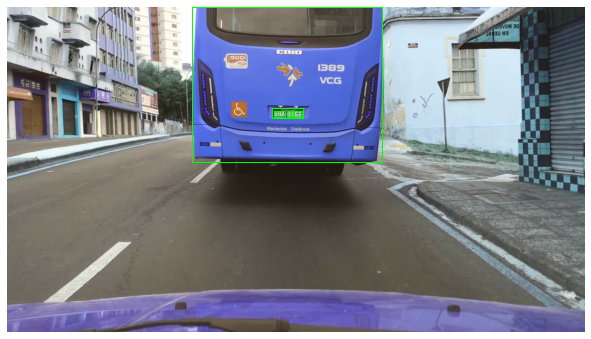

In [113]:
def scale_label(label):
  width = int(label[3]*IMAGE_WIDTH)
  height = int(label[4]*IMAGE_HEIGHT)
  return int(label[1]*IMAGE_WIDTH) - width/2, int(label[2]*IMAGE_HEIGHT - height/2), int(label[1]*IMAGE_WIDTH) + width/2, int(label[2]*IMAGE_HEIGHT + height/2)

def plot_image_with_labels(image, labels):
  fig = plt.figure(figsize=(60, 120))
  axis = fig.add_subplot(10, 5, 1)
  plt.axis('off')

  for i in range(len(labels)) :
  # for i in [1]:
    rect = create_rect(scale_label(labels[i]), (0, 255/255, 0))
    axis.add_patch(rect)
  
  plt.imshow(image)

plot_image_with_labels(img, labels)
